## Bike Rental ##

In [1]:
#Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Step 1: Reading the dataset

In [2]:
path='/Users/ritika/Downloads/Bike-Sharing-Dataset/hour.csv'
if os.path.exists(path):
        df_bike_h = pd.read_csv(path)
else:
    print("File not found at: ", path)

In [33]:
#Printing the first 5 rows of the data
df_bike_h.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,holiday,Clear or Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,holiday,Clear or Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,holiday,Clear or Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,holiday,Clear or Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,holiday,Clear or Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Step 2:  Pre-processing
Explore the possibilities of cleaning the data and renaming the columns

<b> 1. Renaming the columns </b>

In [4]:
df_bike_h = df_bike_h.rename(columns={'dteday':'date','yr':'year','hr': 'hour','mnth':'month','weathersit':'weather',
                       'hum':'humidity','cnt':'count'})

<b> 2. Checking and converting the data types </b>

In [5]:
print('\033[1m'+"Data types of hour data frame:\n" + '\033[0m',df_bike_h.dtypes)

Data types of hour data frame:
 instant         int64
date           object
season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


As we see from the list above the following columns needs a change in the data type: <br>
   a) Date: from object to date <br>
   b) season,year,month,holiday,weekday,workingday,weather from int64 to category


In [6]:
df_bike_h['date'] = pd.to_datetime(df_bike_h["date"], infer_datetime_format=True)
column_names = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for column in column_names:
    df_bike_h[column] = df_bike_h[column].astype('category')

In [34]:
df_bike_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

<b> 3. Check for null/missing values in each column <b>

In [7]:
print("Check missing values in each column of the dataframe: \n",df_bike_h.isnull().sum())

Check missing values in each column of the dataframe: 
 instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


<b> 4. For better clarity mapping the values(numbers) in season, month, weekday and weather columns to corresponding  description from the data description file <b>

In [8]:
# Mapping season
df_bike_h['season'] = df_bike_h['season'].map({1: 'Spring', 2: 'Summer',
                                   3: 'Fall', 4: 'Winter'})
# mapping month
df_bike_h['month'] = df_bike_h['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April',
                               5:'May', 6:'June', 7:'July', 8:'Aug', 
                               9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
# mapping weekday
df_bike_h['weekday'] = df_bike_h['weekday'].map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs',
                               5:'Fri', 6:'Sat', 0:'Sun'})
# mapping weather
df_bike_h['weather'] = df_bike_h['weather'].map({1: 'Clear or Partly Cloudy', 2: 'Misty and Cloudy',
                                   3: 'Light Snow or Rain or Scattered Clouds', 4: 'Heavy Rain or Snow'})

# mapping working day
df_bike_h['workingday'] = df_bike_h['workingday'].map({1: 'working day', 0: 'holiday'})

In [9]:
df_bike_h.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,holiday,Clear or Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,holiday,Clear or Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,holiday,Clear or Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,holiday,Clear or Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,holiday,Clear or Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## STEP 3:  Exploratory Data analysis and Feature Engineering

<b> 1) Outlier analysis using the box plot for count vs each categorical features </b>

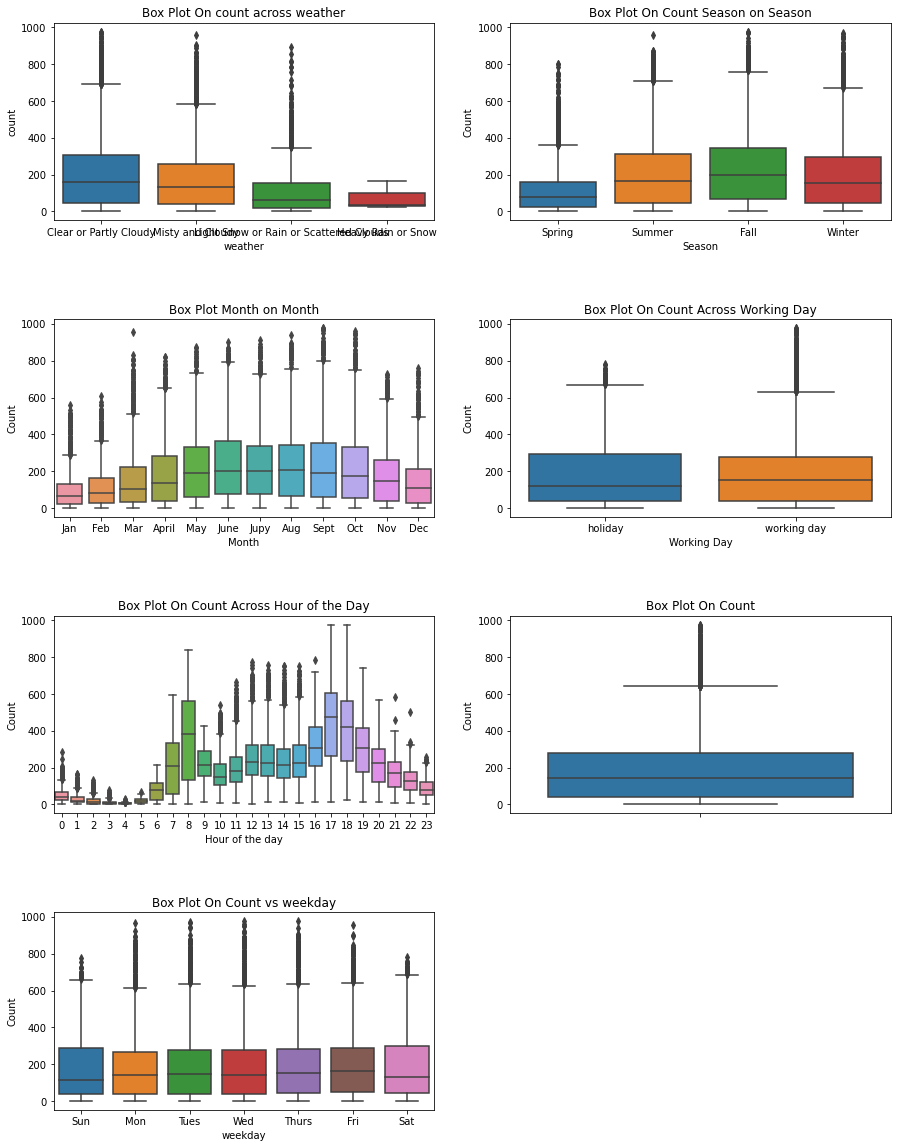

In [66]:
plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.title'] = 20
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(15, 20)
plt.subplots_adjust(hspace = 0.5)
sns.boxplot(data=df_bike_h, y="count",x="weather", orient="v", ax=axes[0][0])
sns.boxplot(data=df_bike_h, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=df_bike_h, y="count", x="month", orient="v", ax=axes[1][0])
sns.boxplot(data=df_bike_h, y="count", x="workingday", orient="v", ax=axes[1][1])
sns.boxplot(data=df_bike_h, y="count", x="hour", orient="v", ax=axes[2][0])
sns.boxplot(data=df_bike_h, y="count", orient="v", ax=axes[2][1])
sns.boxplot(data=df_bike_h, y="count", x="weekday",orient="v", ax=axes[3][0])

axes[0][0].set(ylabel="count",
               #xticklabels=[], 
               title="Box Plot On count across weather")
axes[0][1].set(
    xlabel="Season",
    #xticklabels=[],
    ylabel="Count", 
    title="Box Plot On Count Season on Season"
)
axes[1][0].set(
    xlabel="Month",
    #xticklabels=[],
    ylabel="Count",
    title="Box Plot across Months",
)
axes[1][1].set(
    xlabel="Working Day",
    #xticklabels=[],
    ylabel="Count",
    title="Box Plot On Count Across Working Day",
)
axes[2][0].set(
    xlabel="Hour of the day",
    #xticklabels=[],
    ylabel="Count",
    title="Box Plot On Count Across Hour of the Day",
)
axes[2][1].set(
    ylabel="Count",
    #xticklabels=[],
    title="Box Plot On Count",
)
axes[3][0].set(
    ylabel="Count",
    #xticklabels=[],
    title="Box Plot On Count vs weekday",
)            
axes[3,1].set_axis_off()

In [ ]:
sns.boxplot(data=df_bike_h, y="count",x="weather", orient="v",hue ='weather', ax=axes[0][0])
sns.boxplot(data=df_bike_h, y="count", x="season", orient="v",hue ='season', ax=axes[0][1])
sns.boxplot(data=df_bike_h, y="count", x="month", orient="v", hue ='month', ax=axes[1][0])
sns.boxplot(data=df_bike_h, y="count", x="workingday", orient="v",hue ='workingday', ax=axes[1][1])
sns.boxplot(data=df_bike_h, y="count", x="hour", orient="v",hue ='hour', ax=axes[2][0])
sns.boxplot(data=df_bike_h, y="count", orient="v", ax=axes[2][1])
sns.boxplot(data=df_bike_h, y="count", x="weekday",orient="v",hue ='weekday', ax=axes[3][0])

Looking at the plots above, we can see that the target variable 'count' has many data points outside the maximum whisker which leads us to believe the presence of outliers in the dataset.

More insights from the plots above:

&emsp;   a) Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.<br>
&emsp;   b) In the "Hour Of The Day" plot - the median value are higher at 7AM - 8AM and 5PM - 6PM. It can be attributed       to office users at that time.<br>
&emsp;   c) As expected the count median value on a clear weather is much higher than other weather conditions. <br>
&emsp;   d) Months in Summer and fall season see a higher median count value than other months and season.

<b> 2) Outlier treatment </b>

In [11]:
#removing the outlier points that are greater than mean + or - 3*standard deviation.
df_outlier_treat = df_bike_h[np.abs(df_bike_h["count"] - df_bike_h["count"].mean()) <= (3 * df_bike_h["count"].std())]
print('Dataframe shape Before Outliers: ', df_bike_h.shape)
print('Dataframe After the Outliers: ', df_outlier_treat.shape)
print('Number of Outliers: ',df_bike_h.shape[0] - df_outlier_treat.shape[0])

Dataframe shape Before Outliers:  (17379, 17)
Dataframe After the Outliers:  (17135, 17)
Number of Outliers:  244


<b> 3) Check the distribution of target variable - 'count' <b>

[Text(0.5, 1.0, 'After transformation')]

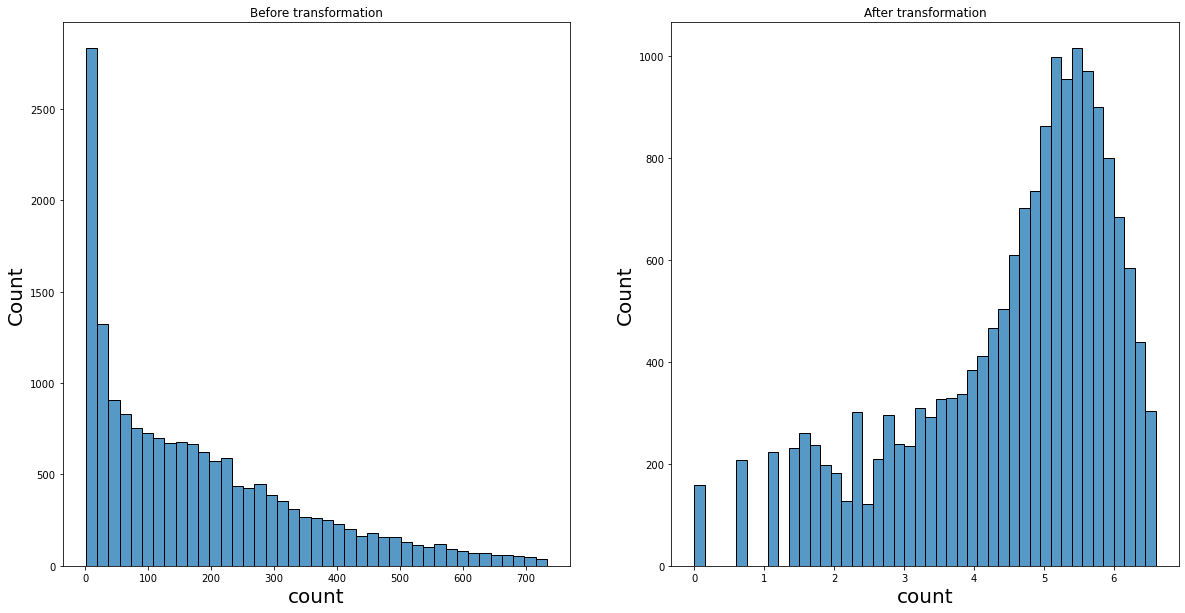

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 10)
sns.histplot(x="count", data=df_outlier_treat, ax=axes[0])
#Doing the log transformation 
df_outlier_treat['count'] = np.log(df_outlier_treat['count'])
sns.histplot(x="count", data=df_outlier_treat, ax=axes[1])
axes[0].set(title="Before transformation")
axes[1].set(title="After transformation")

It is clear that the count variable is skewed towards right before transformation. Most of the machine learning techniques require dependent variable to be normally distributed, so the best practice would be to transform the skewed dependent variable to a normally distributed one. Taking log transformation on count variable after removing outliers makes the distribution much better, still not a perfect normal distribution though

<b> 4) Plotting the correlation matrix to perform correlation analysis on numerical features </b>

<AxesSubplot:>

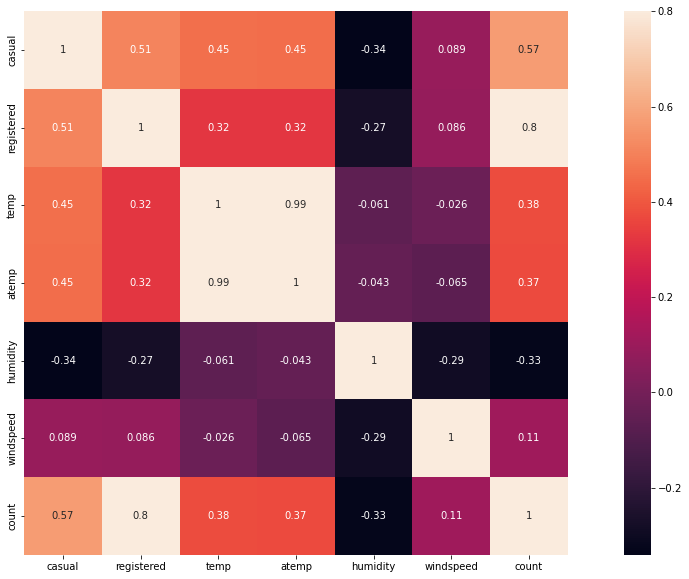

In [86]:
corr_mat= df_outlier_treat[['casual','registered','temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(
    corr_mat, vmax=0.8, square=True, annot=True,
)

Correlation matrix is used to understand how a dependent variable is influenced by numerical features. We can observe the following insights from the correlation matrix above: <br>

&emsp; a) 'atemp' and 'temp' are strongly correlated with each other. It is quite expected as the apparent                    temperature depends on the actual temperature. Hence one of the features has to be dropped since they              exhibit  multicollinearity in the data. We will drop 'atemp'.<br>

&emsp; b) 'Casual' and "Registered" will also be dropped as they are leakage variables because sum of casual and              registered is equal to total count. <br>

&emsp; c) 'temp' has positive correlation with count. Hence we keep this feature <br>

&emsp; d) 'humidity' features has negative correlation with count. <br>

&emsp; e) 'windspeed' has a very low correlation value with count. Hence it is very weakly correlated to count.              This feature will dropped as well.


In [14]:
#Based on analysis above, the following columns/features are removed for model building ('instant' and 'date' are redundant columns)
columns_to_remove = ['instant','date','atemp', 'casual', 'registered', 'windspeed']
df_bike = df_outlier_treat.drop(columns_to_remove, axis=1,)

<b> 5) Plots to do further exploratory data analysis </b>

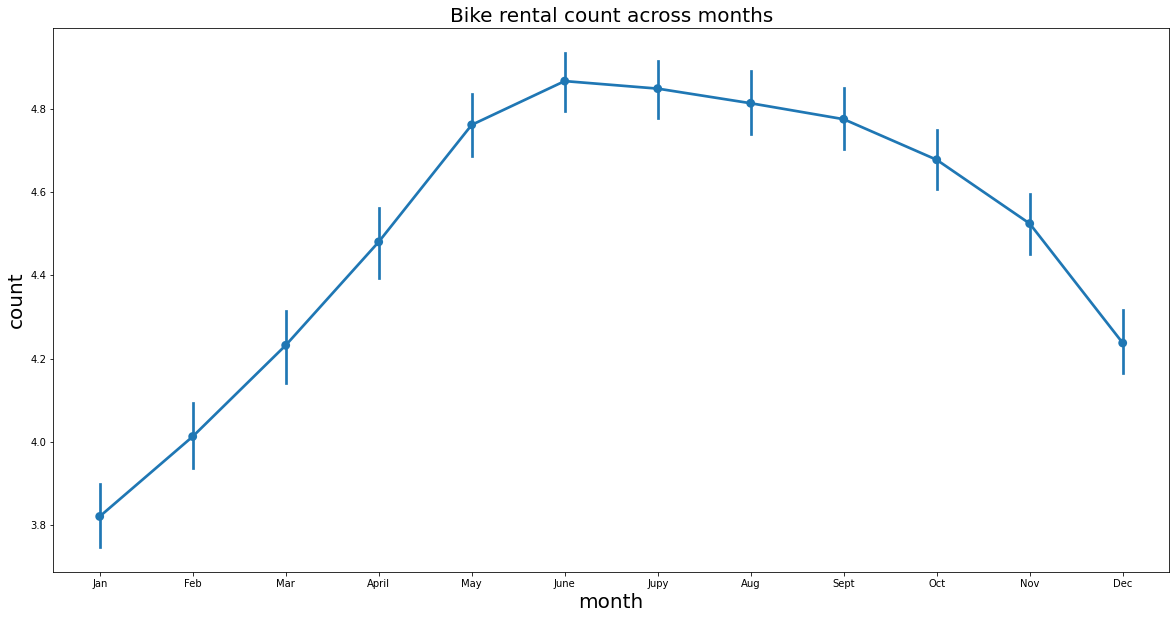

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df_outlier_treat, x='month', y='count', ax=ax)
plt.title('Bike rental count across months', fontsize=20)
plt.rcParams['axes.labelsize'] = 50

Insight from the plot above: <br>
The bike rental count shows a steady gradual increase as we approach the summer(May-Aug). It peaks in June-July. and then starts falling gradually as winter approaches. This is in line with expectation of high usage of bike in summers than in winters. 


Text(0.5, 1.0, 'Rental bike count across weekdays')

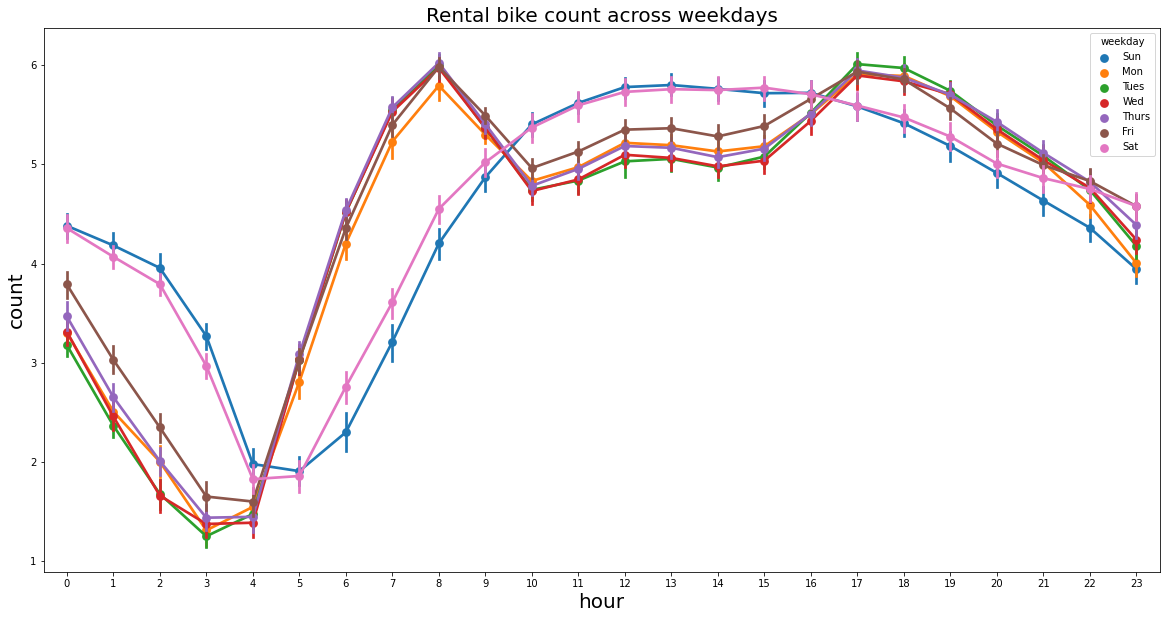

In [77]:
plt.rcParams['axes.labelsize'] = 20
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df_outlier_treat, x='hour', y='count', hue='weekday', ax=ax)
plt.title('Rental bike count across weekdays', fontsize=20)


Insights from the plot above: <br>
Difference in the patterns on a weekend vs weekday can be clearly seen. On the weekdays, the bike rental peaks out twice in a day, around 7am -8am and then around 5 pm-6 pm. Where as, during weeknds, there is a gradual increase in the bike rental count as the day progresses till 4pm. We see a gradual decrease as we move towards night

Text(0.5, 1.0, 'count of rented bikes across season')

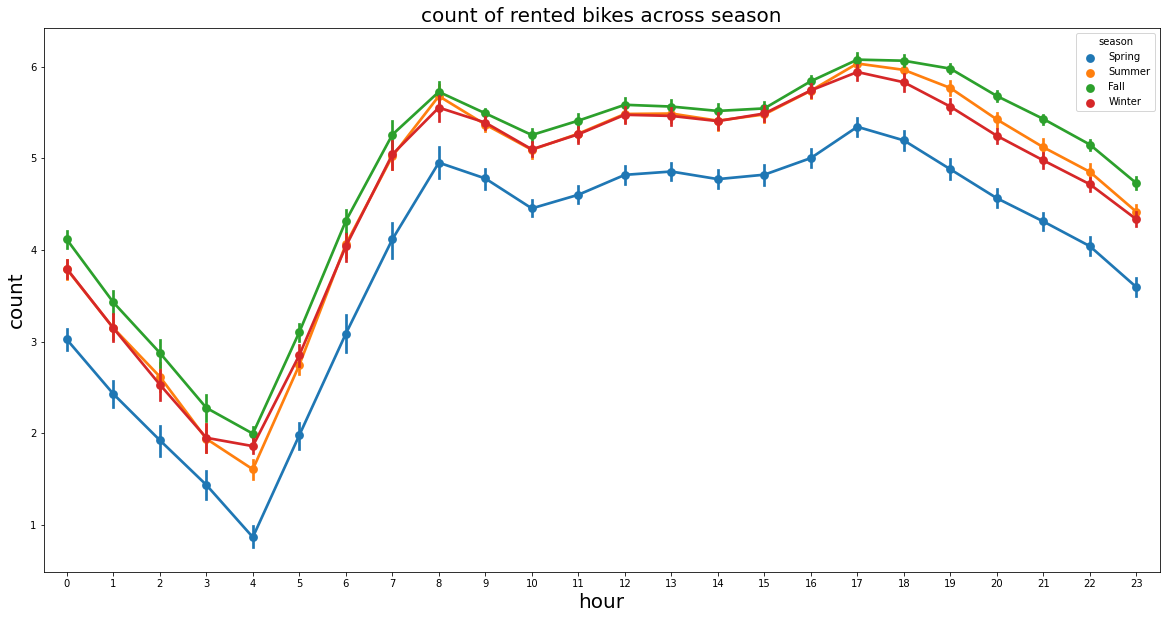

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df_outlier_treat, x='hour', y='count', hue='season', ax=ax)
plt.title('count of rented bikes across season', fontsize=20)

Insights from the plot above:<br>
1) The pattern of bike rental counts over hours in the day is same for all the seasons. <br>
2) As seen before, spring is the season with the lowers bike rental counts.

Text(0.5, 1.0, 'count of rental bikes during different weathers')

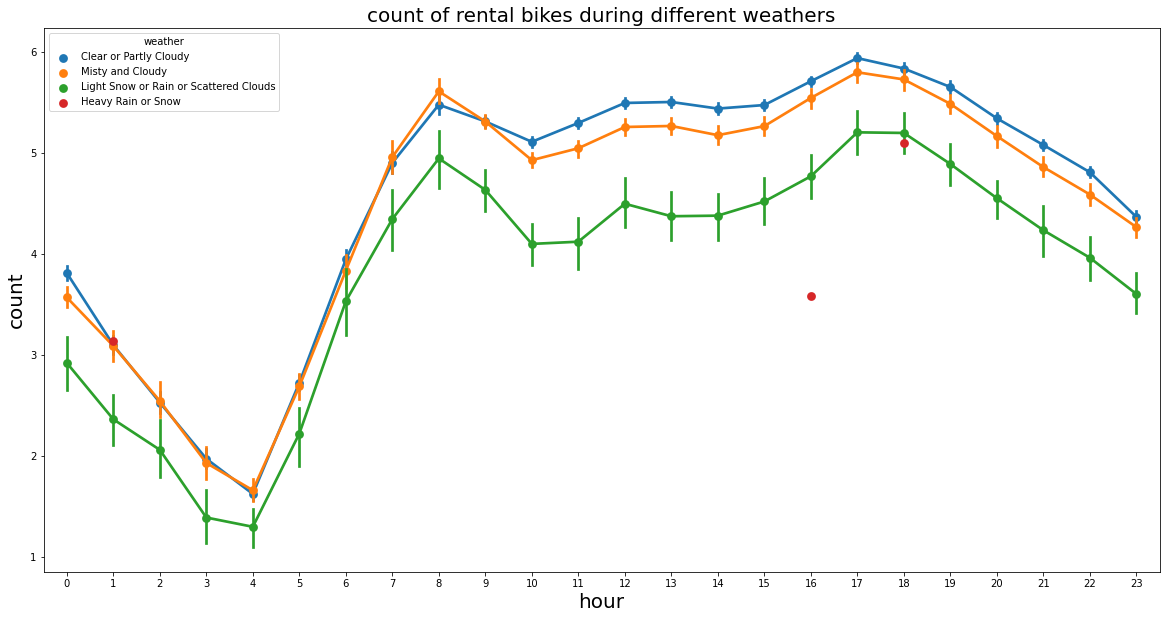

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df_outlier_treat, x="hour", y="count", hue="weather", ax=ax)
plt.title(
    "count of rental bikes during different weathers", fontsize=20
)

Text(0.5, 1.0, 'count of rental bikes across days of the week for unregistered users')

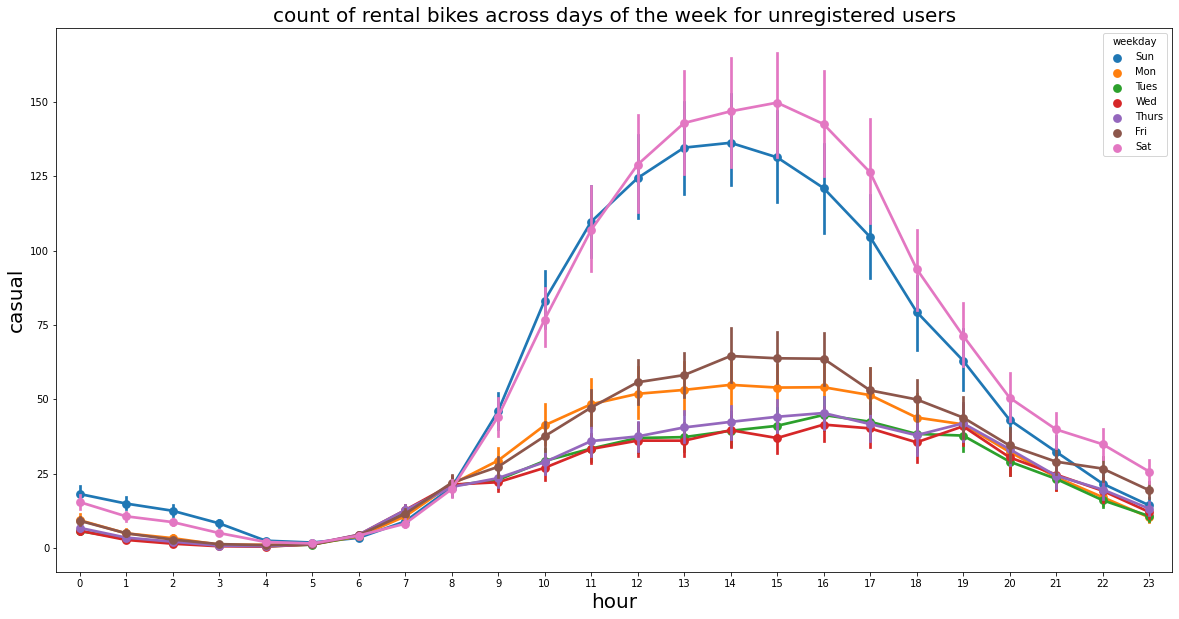

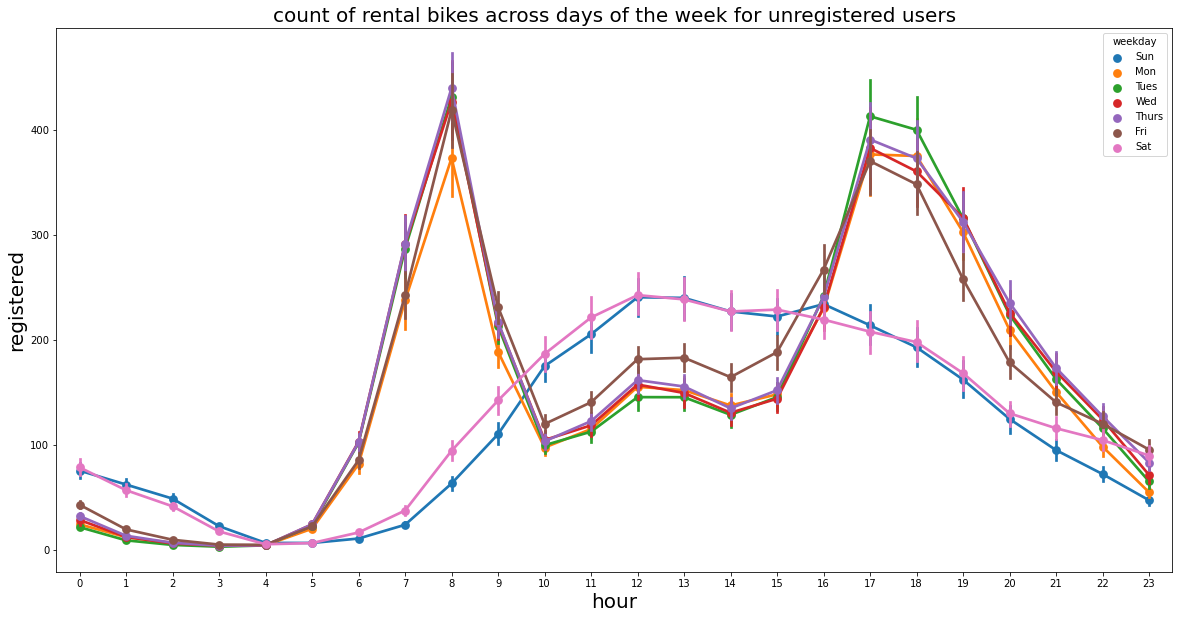

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df_outlier_treat, x="hour", y="casual", hue="weekday", ax=ax)
plt.title(
    "count of rental bikes across days of the week for unregistered users",
    fontsize=20,
)

fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df_outlier_treat, x="hour", y="registered", hue="weekday", ax=ax)
plt.title(
    "count of rental bikes across days of the week for unregistered users",
    fontsize=20,
)

Insights from the graph above:

1) The graph for unregistered users might point to the fact that most unregistered users are casual users and they do not show any sharp rise in count during a particular time of the day. The demand rises gradually as the day progresses until 2 pm and then gradually declines. The over all demand is the highest on weekends.

2) The graph for registered users might point to the fact that most resgistered users are regular users. There  is a peak in the demand at 7am - 8am and again at 5pm - 6pm on. weekdays probably due to the need of commutation to work place, university, schools during the weekdays. 

## STEP 5: Preparing the data to be used in the ML models 

<b> 1) One hot encoding </b>

In [20]:
#One hot encoding all the category features
columns = ["season", "weather", "holiday", "weekday", "workingday","month",'year','hour']
for column in columns:
    df_encoded = pd.get_dummies(df_bike[column], prefix=column, drop_first=True)
    df_bike = pd.concat([df_bike, df_encoded], axis=1)
df_bike = df_bike.drop(columns, axis=1)

<b> 2) Splitting the data into feature space and target space </b>

In [21]:
#Splitting the data into features and target
x = df_bike.drop('count', axis=1)
y = df_bike['count']
print('Features shape is: ', x.shape)
print('Target shape is: ', y.shape)

Features shape is:  (17135, 51)
Target shape is:  (17135,)


<b> 3) Splitting the data into test dataset and train dataset. <b>

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=42)

## STEP 6: Choosing a Model

<b> 1) Multi linear regression: <b>

In [23]:
model_reg = LinearRegression()

# Running the model on Training Data
lin_reg=model_reg.fit(x_train,y_train)

# Predicting on the test data set
y_pred_reg=lin_reg.predict(x_test)

# Finding the mean absolute  error
print('Mean Absolute error for linear regression: ',mae(y_test, y_pred_reg))


Mean Absolute error for linear regression:  0.4730629642713058


<b> 2) Random Forest </b> 

In [24]:
model_rf = RandomForestRegressor(random_state=42)

In [25]:
np.random.seed(42)

# Selecting best max_depth, maximum features, split criterion and number of trees
param_dist = {'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
              "n_estimators" : [100 ,200 ,300 ,400 ,500]
             }
cv_randomForest = RandomizedSearchCV(model_rf, cv = 10,
                     param_distributions = param_dist, 
                     n_iter = 10)

cv_randomForest.fit(x_train, y_train)
print('Best Parameters using random search: \n', 
      cv_randomForest.best_params_)


Best Parameters using random search: 
 {'n_estimators': 100, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


In [26]:
# Set best parameters given by random search
model_rf.set_params( max_features = None,
               max_depth =10 ,
               n_estimators = 100,
               bootstrap = True
              )

RandomForestRegressor(max_depth=10, max_features=None, random_state=42)

In [27]:
#Fit the random forest model to train dataset
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, random_state=42)

In [28]:
# Predict on the test dataset
y_pred_rf = model_rf.predict(x_test)
# Calculate the absolute errors
print('Mean Absolute error for random forest model: ',mae(y_test, y_pred_rf))

Mean Absolute error for random forest model:  0.4869715558355405


3) <b> XGBOOST </b>

In [29]:
#hyperparameter tuning for estimating the best parameters for the model
hyperparameter_grid={'n_estimators': [100,500,900,1100,1500],
                    'max_depth':[2,3,5,10],
                    'learning_rate':[0.05,0.1,0.15,0.20],
                    'min_child_weight':[1,2,3,4],
                    'booster':['gbtree','gblinear'],
                    'base_score':[0.25,0.5,0.75],
                    'gamma':[0,1]}

In [89]:
xgb_model = XGBRegressor(silent=True)

random_cv = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=hyperparameter_grid,
    cv=5,
    n_iter=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=0,
    return_train_score=True,
    random_state=42,
)
random_cv.fit(x_train,y_train)
print('Best Estimator for XGBoost: \n',random_cv.best_estimator_)

best_estimator = random_cv.best_estimator_

#Fitting the model on the training dataset    
best_estimator.fit(x_train, y_train)

#Making predictions with the model on test data
y_pred_xg = best_estimator.predict(x_test)

#printing the mean absolute percentage error
print('Mean Absolute error for xgboost: ',mae(y_test, y_pred_xg))

[14:48:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Estimator for XGBoost: 
 XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True